# If a Colorado Michelin Star restaurant has 450 Google reviews, how many Yelp reviews does it have?
I will use a sample of Google and Yelp reviews from the first 20 of the 50 Coloradan restaurants on the Michelin website. This will be an retrospective observational study using a sample of the population of Coloradan Michelin Star restaurants.
This data was hand collected using the listed restaurants on the Michelin Restaurant website, data from Yelp, and data from Google.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("Restaurant_Data.csv")

In [11]:
correlation = df["Num_Google_Reviews"].corr(df["Num_Yelp_Reviews"])
print("Correlation coefficient:", correlation)

# Select just the columns you want
subset = df[["Num_Google_Reviews", "Num_Yelp_Reviews"]]

# Pearson correlation
r = df["Num_Google_Reviews"].corr(df["Num_Yelp_Reviews"])

# Coefficient of determination
r_squared = r**2
print("R²:", r_squared)

# Get correlation matrix
corr_matrix = subset.corr()
print(corr_matrix)

Correlation coefficient: 0.8727939004387308
R²: 0.7617691926430532
                    Num_Google_Reviews  Num_Yelp_Reviews
Num_Google_Reviews            1.000000          0.872794
Num_Yelp_Reviews              0.872794          1.000000


Outliers:
                               Name            Neigborhood Type_of_Restaurant  \
9  Mercantile Dining and Provision  Union Station, Denver           American   

   Num_Google_Reviews  Google_Rating  Num_Yelp_Reviews  Yelp_Rating  \
9                1800            4.5              1400          4.2   

       y_pred    residual  
9  818.520577  581.479423  


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


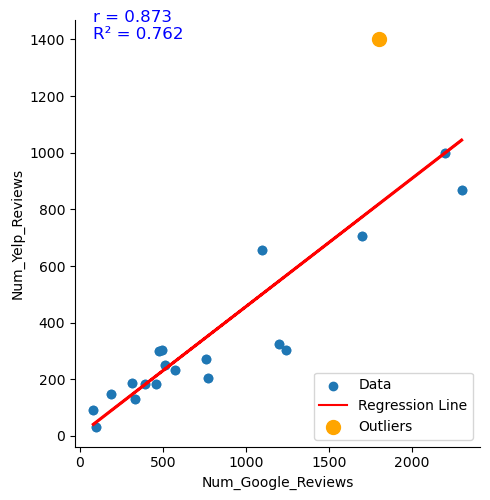

In [18]:
sns.lmplot(x="Num_Google_Reviews", y="Num_Yelp_Reviews", data=df, ci=None, line_kws={"color":"red"})

r = df["Num_Google_Reviews"].corr(df["Num_Yelp_Reviews"])
r_squared = r**2

plt.text(df["Num_Google_Reviews"].min(), df["Num_Yelp_Reviews"].max(), f"r = {r:.3f}\nR² = {r_squared:.3f}", 
         fontsize=12, color="blue")

# Fit line
m, b = np.polyfit(df["Num_Google_Reviews"], df["Num_Yelp_Reviews"], 1)

# Calculate residuals
df["y_pred"] = m*df["Num_Google_Reviews"] + b
df["residual"] = df["Num_Yelp_Reviews"] - df["y_pred"]
df.head

# Define threshold for outlier (e.g., 2 standard deviations)
threshold = 2 * df["residual"].std()

outliers = df[np.abs(df["residual"]) > threshold]
print("Outliers:\n", outliers)

# Plot with outliers highlighted
plt.scatter(df["Num_Google_Reviews"], df["Num_Yelp_Reviews"], label="Data")
plt.plot(df["Num_Google_Reviews"], df["y_pred"], color="red", label="Regression Line")
plt.scatter(outliers["Num_Google_Reviews"], outliers["Num_Yelp_Reviews"], color="orange", s=100, label="Outliers")
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df["Num_Google_Reviews"].values.reshape(-1, 1)
y = df["Num_Yelp_Reviews"].values

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
x_new = np.array([[450]])
y_pred = model.predict(x_new)

print(f"Predicted y at x=6: {y_pred[0]}")

Predicted y at x=6: 207.57406725150688


# Using the data collected and the best fit line graphed on the scatter plot, we can predict that if a Michelin Restaurant in Colorado had 450 reviews on Google, it would have approximately 208 reviews on Yelp.
This answer may be biased, as the data collected is only the first 20 of the 50 restaurants in Colorado that are listed on the Michelin Website.